In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

#necessary modules for model building

import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [ ]:
#importing dataset from google drive
data = pd.read_csv('/content/drive/MyDrive/MLProject-ChurnPrediction-main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
for col in data:
    print(col)
    print(data[col].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [ ]:
#observing top 5 values
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#checking the shape of data-set (rows,columns)
data.shape

(7043, 21)

In [ ]:
data.columns #checking the column names of the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data['Churn'].value_counts() # number of yes and No values in dataset

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
data.nunique() # number of unique values in each column

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
data.info() # data type of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Though our dataset is not having any missing value as observed, but if in case we have any missing value than in order to deal with missing value we can do following techniques.
- If missing values are less,than we can drop those rows.
-If missing values are less, than we can use data imputation techniques like using mean,mode or median or regression to impute tha values in missing areas.
-If the missing values are high in number and the column is not having that much influence in output than we can drop off that column(like atleast 30% of missing values, and in this case domain knowledge is important).
-There are also many other data imputation techniques which can be used accordingly

In [ ]:
data.describe() # checking the descriptive statisctis of each numeric variables

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Senior citizen is integer but categorical in nature with values 1 and 0 so percentile is not beneficial.
- Tenure values are in number of months, 75 % customers are having tenure less than 55 months.
- Average tenure is 32 months.
- Average monthly charge is 64.76 USD and 75% customers pays more than 89.85 USD per month.

In [ ]:
data[data['Churn']=='Yes']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Exploratory data analysis

Plotting no. of Yes and No Churn Values.

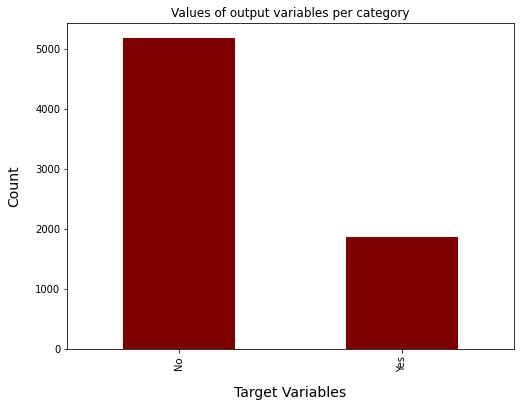

In [ ]:

data['Churn'].value_counts().plot(kind='bar',figsize=(8,6),color='maroon')
plt.xlabel("Target Variables",labelpad=14,size=14)
plt.yticks(size=10)
plt.ylabel("Count",labelpad=14,size=14)
plt.title("Values of output variables per category")
plt.show()


In [ ]:
# churners value in percentage
(data['Churn'].value_counts()/data['Churn'].count())*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

- Data is imbalanced in nature with ration 73:27

- As data set is imbalanced in nature, we have to make it balanced in nature.
- In order to make it balanced dataset, we can go for upsampling or downsampling of dataset(It is one the technique to convert unbalanced dataset into balanced dataset).


---

InCase of Down sampling, there's a possibility of loosing usefull information so we will go for Upsampling.

## Data Cleaning

In [ ]:
 # to perform various EDA techniques and to ensure there are truly no null
 # values, we perform various Cleaning techniques.

## Creating copy of base data for manipulation and processing

data_copy = data.copy()


In [ ]:
# As columns like total charges should be specifically numeric thus performing operation

data_copy['TotalCharges']=pd.to_numeric(data_copy.TotalCharges, errors='coerce')
data_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**OBSERVATION :** Even though in object format Total Charges Column wasn't giving any nul values but as we converted it into numeric format.It gave Null value count to 11.
That is also one of many reasons we have to convert object data type to accurate data type.

### Also since the number of none value columns is very low, so it is safe to drop these columns

In [ ]:
data_copy.loc[data_copy['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
data_copy.dropna(how='any',inplace=True) # removing the missing values

In [ ]:
 # creating the bin(range) out of the tenures of customer
 # for
 # getting the maximum values of tenure column
 print(data_copy['tenure'].max())

72


In [ ]:
# grouping the labels into bins of 12 months
labels = ["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
data_copy['tenure_group'] = pd.cut(data_copy.tenure,range(1,80,12),right=False,labels=labels)

In [ ]:
data_copy['tenure_group'].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [ ]:
#droping off irrelevant columns
data_copy.drop(columns=['customerID','tenure'],axis=1,inplace=True)
data_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## Exploratory Data Analysis

#### Univariate Plotting



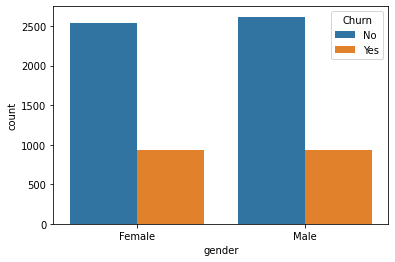

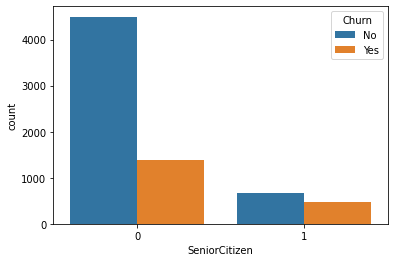

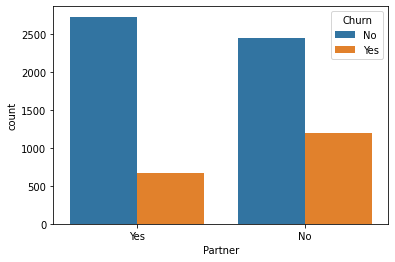

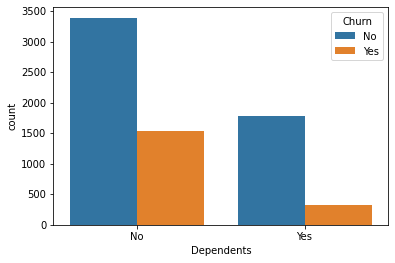

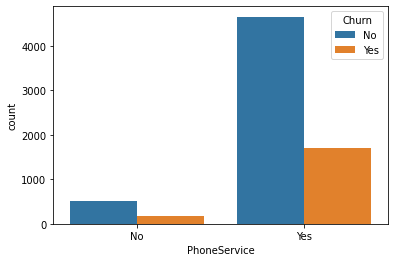

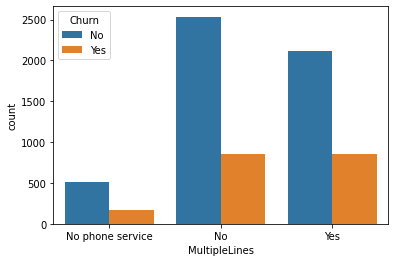

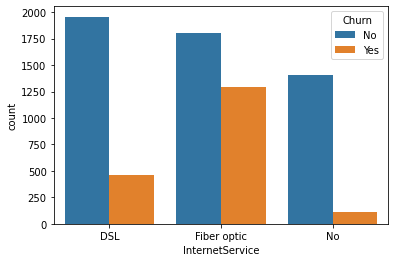

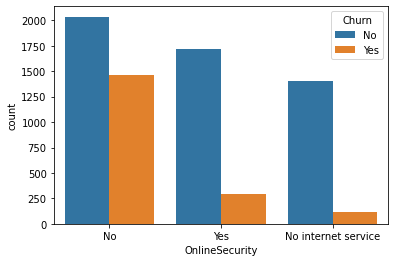

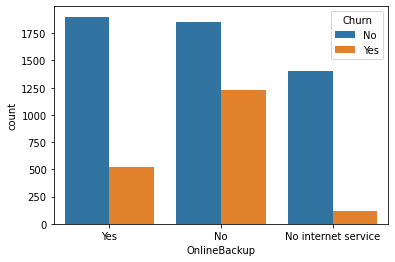

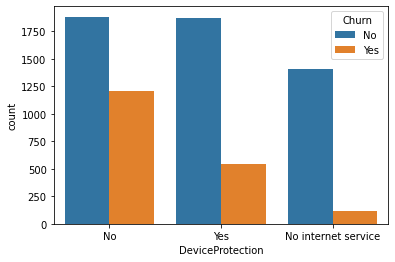

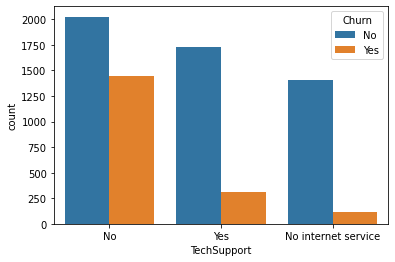

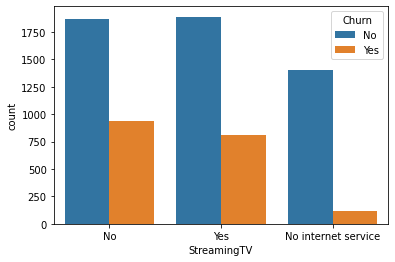

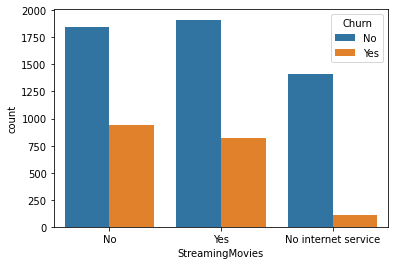

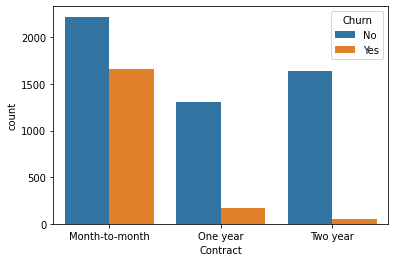

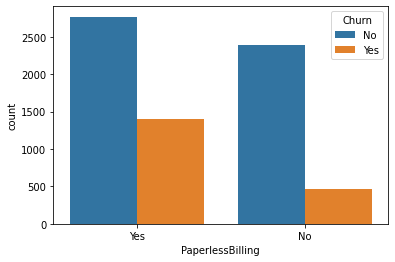

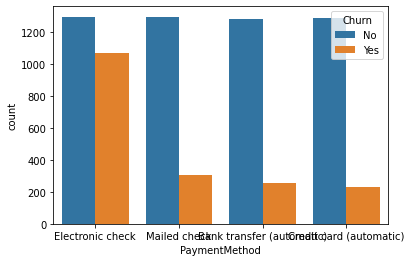

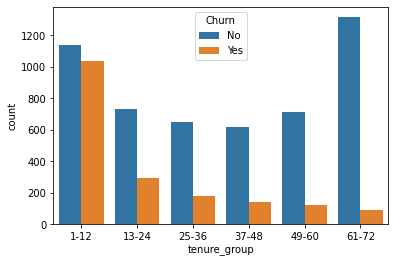

In [ ]:
# Plotting individual Predictors for churn
for i,predictor in enumerate(data_copy.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=data_copy,x=predictor,hue='Churn')

In [ ]:
# as computer only understands numbers so converting output variable churn into integers
data_copy['Churn'] = np.where(data_copy.Churn=='Yes',1,0)

#### Converting all the categorical variables into Dummy numerical values

In [ ]:
data_copy_dummies = pd.get_dummies(data_copy)
data_copy_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


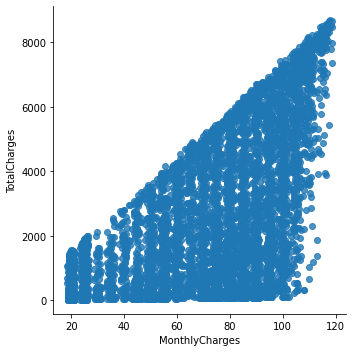

In [ ]:
#plotting to show relation ship between  monthly charges and TOTAL charges
sns.lmplot(data=data_copy_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)
## total charges directly proportional to monthly charges

Text(0.5, 1.0, 'monthly charges by churn')

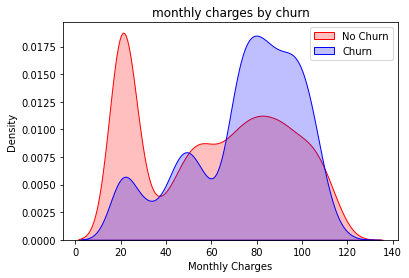

In [ ]:
# checking churning by monthly charges and total charges
monthly = sns.kdeplot(data_copy_dummies.MonthlyCharges[(data_copy_dummies['Churn']==0) ] ,
                      color='Red',shade=True)
monthly = sns.kdeplot(data_copy_dummies.MonthlyCharges[(data_copy_dummies['Churn'])==1],
                      ax=monthly,color="Blue",shade=True)
monthly.legend(["No Churn","Churn"],loc='upper right')
monthly.set_ylabel("Density")
monthly.set_xlabel("Monthly Charges")
monthly.set_title('monthly charges by churn')

In [ ]:
##Showing high churn at high monthly charges

# It is always important to do univariate and multivariate analysis to get the proper insight

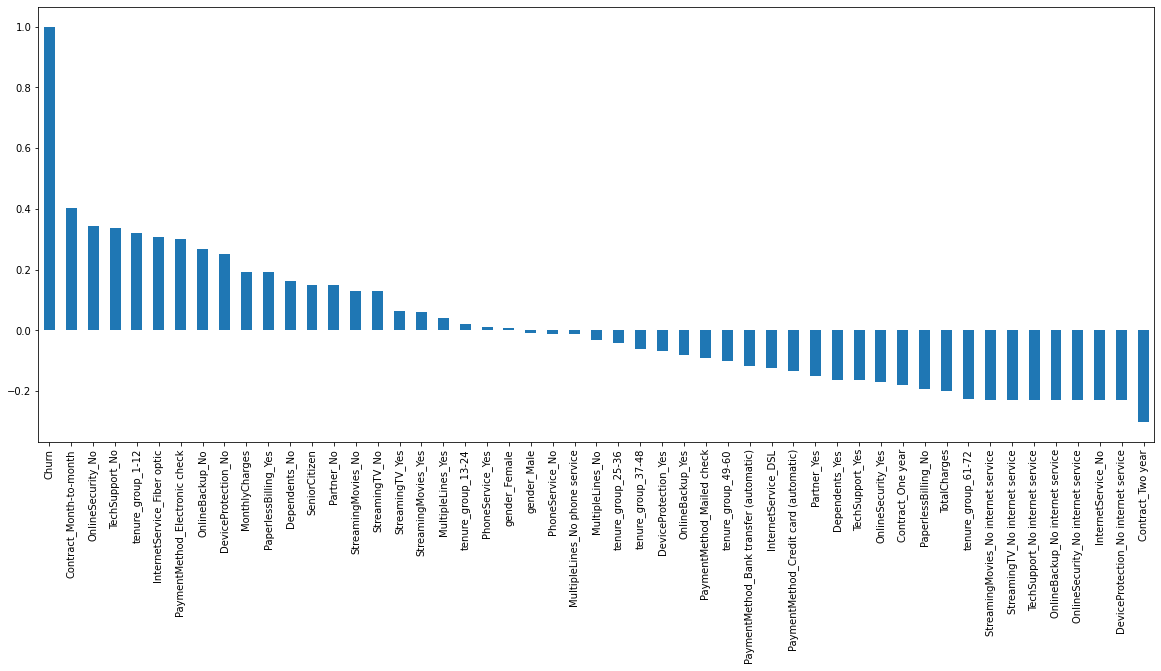

In [ ]:
# it is also always to draw correleation chart of all the attributes
# with the output variable as it also gives insight that which attribute is
# important for getting the output
plt.figure(figsize=(20,8))
data_copy_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### here we have used bar plot for showing correleation but we can use conventional heat map correleation chart also.
### It is used as sometime bar plot gives good understandable view also we wanted to make correlation with respect to one feature only and didn't wanted to see correlation among features itself.

*Derived Insight*

- High churner are one having month-to-month contract basis, people having no security deposit, no technical support provided, or if person is in first year of subscription. So it is necessary to hold customer during it's first year of contract.
- Low Churn is seen in case if person is having long-term-contract,if person is associated with more than 5 years.
- Features like Gender,Availability of Phone Service and number of multiple lines have almost NO impact on Customer Churn.


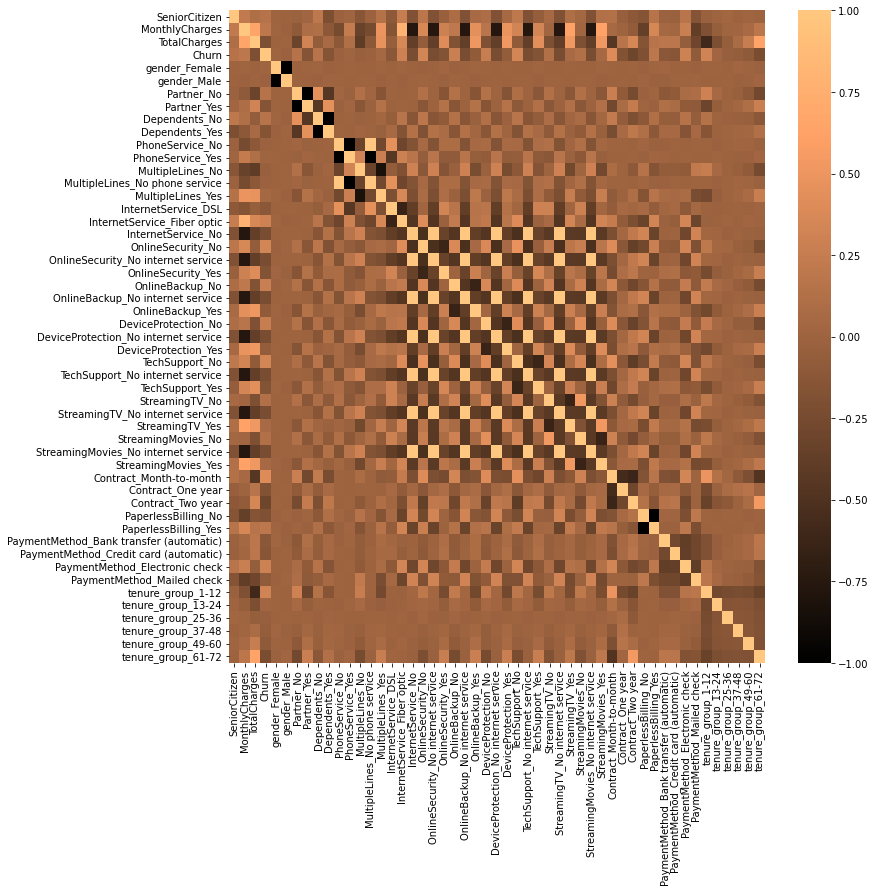

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data_copy_dummies.corr(),cmap='copper')

### Doing Bivariate Analysis

In [ ]:
target0 = data_copy.loc[data_copy["Churn"]==0]
target1 = data_copy.loc[data_copy["Churn"]==1]

In [ ]:
#function to get plot choosing our feature
def uniplot(df,col,title,hue=None):

  sns.set_style('whitegrid')
  sns.set_context('talk')
  plt.rcParams["axes.labelsize"]=20
  plt.rcParams['axes.titlesize']=22
  plt.rcParams['axes.titlepad']=30

  temp = pd.Series(data=hue)
  fig,ax = plt.subplots()
  width = len(df[col].unique())+7+4*len(temp.unique())
  fig.set_size_inches(width,8)
  plt.xticks(rotation=45)
  plt.yscale('log')
  plt.title(title)
  ax = sns.countplot(data=df, x = col, order=df[col].value_counts().index,hue=hue,palette='bright')

  plt.show()

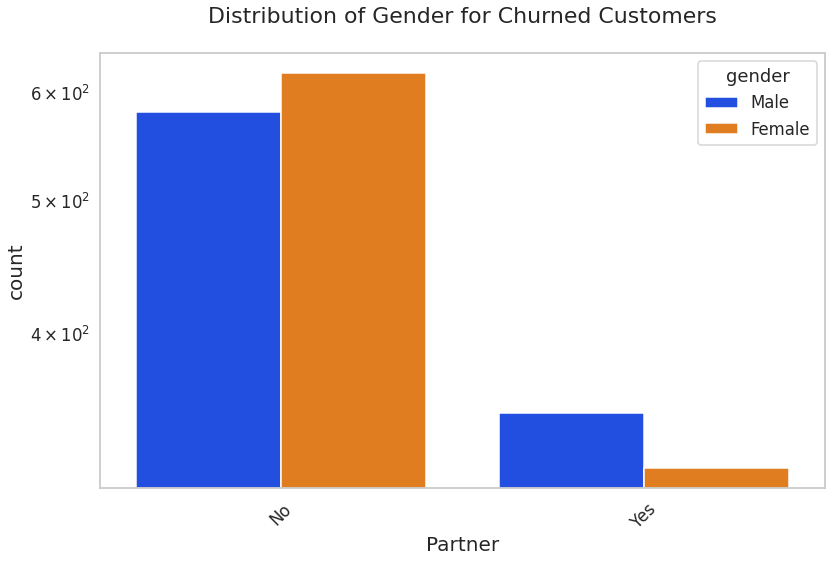

In [ ]:
uniplot(target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

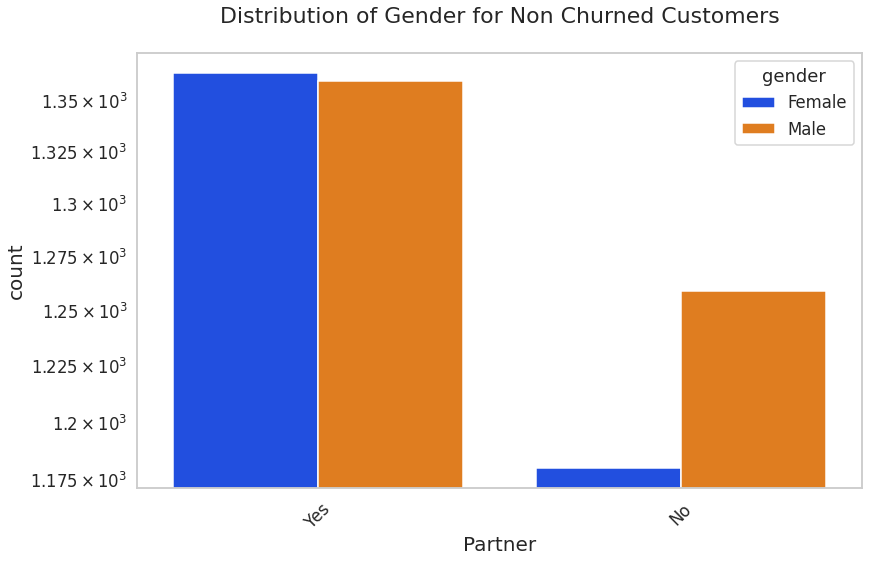

In [ ]:
uniplot(target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

- we observed that Churned percentage is high when people have no dependent partner. But male to female ratio is almost similliar.

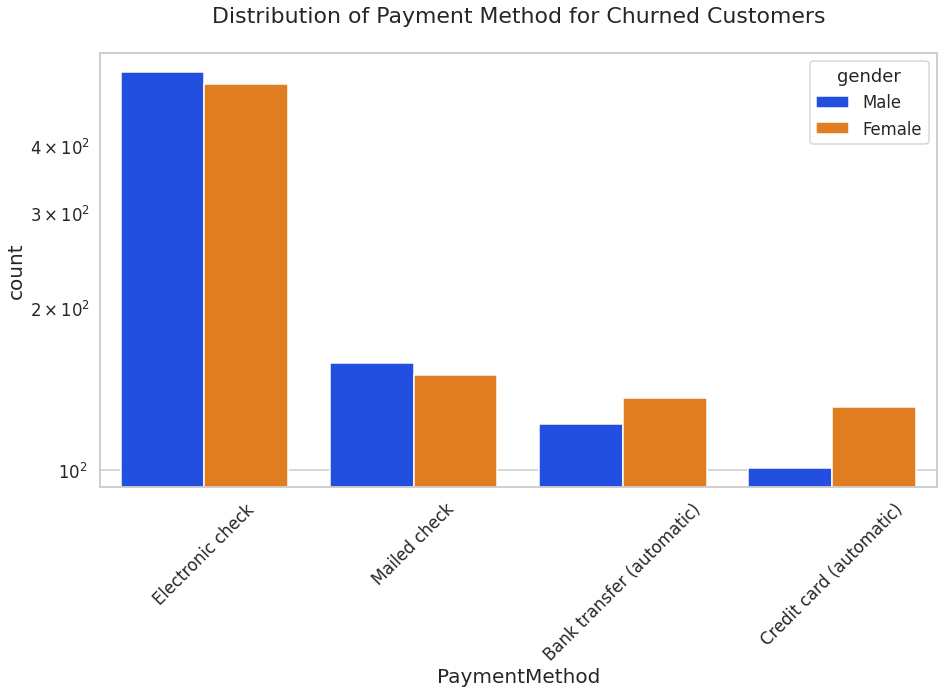

In [ ]:
uniplot(target1,col='PaymentMethod',title='Distribution of Payment Method for Churned Customers',hue='gender')


### Churned Percentage is very high if the payment method is Electronics Check, irrespective of the gender.

Similliar we can try for other columns.

In [ ]:
# saving preprocessed data as csv file
data_copy_dummies.to_csv('final_data.csv')

# **Model Building**

In [ ]:
# reading the saved csv file,
# because here we are continuing the work in same Jupyter file
# but if we would have been doing it in different file than in that case we would be importing

final_data = pd.read_csv('final_data.csv')

In [ ]:
final_data.head(5)

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
final_data = final_data.drop('Unnamed: 0',axis=1)

In [ ]:
final_data.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
# creating x and y variables
x = final_data.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
y = final_data['Churn']

In [ ]:
#train test splitting of data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

### Decision Tree Classifier(No specific Reason)

In [ ]:
model_dt = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=6,min_samples_leaf=8)

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred = model_dt.predict(x_test)

In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
model_dt.score(x_test,y_pred)

1.0

In [ ]:
print(classification_report(y_test,y_pred,labels=[0,1])) # classification Report
# from classification report,always look at the minority class
# in our case Churners is the minority class
# by observing various parameters, we conclude that our model is not properly optimised

# one reason can be that our dataset is imbalanced

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1027
           1       0.60      0.53      0.56       380

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
print(confusion_matrix(y_test,y_pred)) #confusion matrix

[[896 131]
 [180 200]]


In [ ]:
#to balancing the dataset, we use smot analysis
# for that we are using smoteen

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [ ]:
model_dt_smote = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=6,min_samples_leaf=8)

In [ ]:
model_dt_smote.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_smote = model_dt_smote.predict(xr_test)

In [ ]:
print(classification_report(yr_test,y_pred_smote,labels=[0,1]))
#now looking at miniority result, we are getting much better results

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       522
           1       0.91      0.97      0.94       645

    accuracy                           0.93      1167
   macro avg       0.94      0.93      0.93      1167
weighted avg       0.93      0.93      0.93      1167




# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100,criterion='gini',random_state = 100,max_depth=6,min_samples_leaf=8)
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_rf,labels=[0,1])) #same case as decision tree when imbalanced dataset was taken into consideration

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1027
           1       0.64      0.47      0.54       380

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
#again creating the smote part for random forest to check if we are getting better result in thiscase


In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [ ]:
xr_train,xr_test,yr_train,yr_test = train_test_split(X_resampled,y_resampled,test_size=0.2)

In [ ]:
model_rf_smote = RandomForestClassifier(n_estimators=100,criterion='gini',random_state = 100,max_depth=6,min_samples_leaf=8)

In [ ]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred_smote_rf = model_rf_smote.predict(xr_test)

In [ ]:
print(classification_report(yr_test,y_pred_smote_rf,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       539
           1       0.91      0.97      0.94       633

    accuracy                           0.93      1172
   macro avg       0.93      0.93      0.93      1172
weighted avg       0.93      0.93      0.93      1172



In [ ]:
print(confusion_matrix(yr_test,y_pred_smote_rf))

[[477  62]
 [ 21 612]]


## Saving the model

In [ ]:
import pickle


In [ ]:
filename = 'model.sav'

In [ ]:
pickle.dump(model_rf_smote,open(filename,'wb'))

In [ ]:
# calling the model
load_model = pickle.load(open(filename,'rb'))

In [ ]:
load_model.score(xr_test,yr_test)

0.9291808873720137